## Logistic Regression

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

data_path = "./data/"
Default = pd.read_csv(data_path + "Default.csv")

In [10]:
# 개인의 연봉과 월 신용카드 잔고를 사용한 파산 예측
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


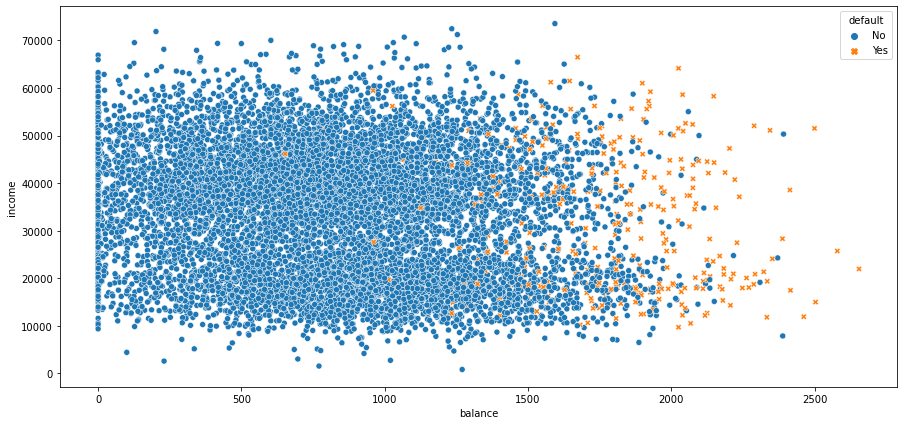

In [11]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(x= "balance", y="income", data=Default, hue="default", style='default')
plt.show()

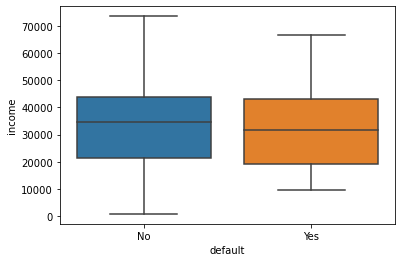

In [12]:
sns.boxplot(x='default', y='income', data=Default)
plt.show()

- 선형 회귀모형은 적당하지 않음
<img src='http://drive.google.com/uc?export=view&id=1KEcn9veVn0QLXHCIo9CZyU91YRZoOPjE'>

#### 단순 로지스틱 회귀 모형

In [13]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [14]:
Default = pd.concat([Default,pd.get_dummies(Default.default,prefix="default")],axis=1)
Default.head()

,default,student,balance,income,default_No,default_Yes
0,No,No,729.526495,44361.625074,1,0
1,No,Yes,817.180407,12106.134700,1,0
2,No,No,1073.549164,31767.138947,1,0
3,No,No,529.250605,35704.493935,1,0
4,No,No,785.655883,38463.495879,1,0


In [15]:
# Balance의 회귀계수 p-value < 0.0001 : 파산확률 카드잔고 사이의 통계적으로 유의미한 관계가 있음
model = smf.glm('default_Yes~balance', data=Default, family = sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -798.23
Date:                Thu, 02 Feb 2023   Deviance:                       1596.5
Time:                        19:38:10   Pearson chi2:                 7.15e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1240
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================
"""

In [16]:
# 계수를 직접적으로 해석하기 힘들기 때문에, exp 통해 해석함
# np.exp(model.param[1]*100) = 1.733 → 1.733배 증가 → 파산승산 73.3% 증가
# Beta 1 의 값이 음수라면? exp 값이 1보다 작아지며, 작아진 배수만큼 감소
# (예) 0.95배 증가 → 5% 감소
np.exp(model.params[1])

1.0055140637295612

In [17]:
# Balance가 1 증가하면 파산승산(odds)가 1.005514배 증가함 = 즉, 0.55% 증가
# Balance가 100 증가하면 파산승산은 얼만큼 증가하는가?
model2 = smf.glm('default_Yes~student', data=Default, family = sm.families.Binomial()).fit()
model2.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-3.5041,0.071,-49.554,0.000,-3.643,-3.366
student[T.Yes],0.4049,0.115,3.520,0.000,0.179,0.630


In [18]:
# 학생이면 파산의 odds가 약 50% 증가
np.exp(model2.params[1])

1.4991332099291805

#### 다중 로지스틱 회귀 모형

In [19]:
model3 = smf.glm('default_Yes~balance + student', data=Default, family = sm.families.Binomial()).fit()
model3.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-10.7495,0.369,-29.115,0.000,-11.473,-10.026
student[T.Yes],-0.7149,0.148,-4.846,0.000,-1.004,-0.426
balance,0.0057,0.000,24.748,0.000,0.005,0.006


In [20]:
# 동일한 Balance를 가지고 있을 때 학생이면 파산 odds가 약 51% 감소함 = 앞의 결과와 상반된 방향
np.exp(model3.params[1])

0.48925198228632616

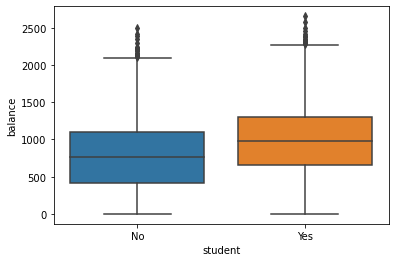

In [21]:
# Confounding Effect
sns.boxplot(x='student', y='balance', data=Default)
plt.show()

#### 로지스틱 회귀 실습 (변수 선택 실습 추가)

1. 13개의 설명변수를 모두 사용하여 medev를 설명하는 회귀모형을 적합하고 각 설명변수의 VIF 값을 계산하시오.

In [22]:
boston = pd.read_csv(data_path + "Boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
"+".join(boston.columns[:-1])

'crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [24]:
formula = 'medv~' + "+".join(boston.columns[:-1])
formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [25]:
model_full = smf.ols(formula,data=boston).fit()

import patsy
y, X = patsy.dmatrices(formula,boston, return_type='matrix')

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 585.2652379423121
VIF of crim : 1.7921915474332406
VIF of zn : 2.298758178749442
VIF of indus : 3.9915964183460333
VIF of chas : 1.0739953275537886
VIF of nox : 4.393719847577495
VIF of rm : 1.9337444357832565
VIF of age : 3.1008255128153372
VIF of dis : 3.9559449063727263
VIF of rad : 7.484496335274472
VIF of tax : 9.00855394759707
VIF of ptratio : 1.7990840492488995
VIF of black : 1.348521076406375
VIF of lstat : 2.9414910780919366


In [26]:
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 02 Feb 2023   Prob (F-statistic):          6.72e-135
Time:                        19:41:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. All subset regression을 통해 변수선택을 하시오. AIC, BIC, adjusted R-square를 사용할 때 각 기준에 따라 최적의 모형이 달라지는가?

In [27]:
import patsy
y, X = patsy.dmatrices(formula,boston, return_type='dataframe')

In [28]:
import itertools
import time
import statsmodels.api as sm

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    X_model = X[list(('Intercept',)+feature_set)]
    model = sm.OLS(y, X_model)
    regr = model.fit()
    RSS = (regr.resid ** 2).sum()
    return {"model":regr, "RSS":RSS, "AIC": regr.aic, 
            "BIC": regr.bic, "adj_r2": regr.rsquared_adj,
           "r2":regr.rsquared }

def getBest(k, best = "AIC"):
    
    tic = time.time()   
    results = []
    
    for combo in itertools.combinations(X.columns[1:], k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    if best=="adj_r2" or best=="r2":
        best_model = models.loc[models[best].argmax()]
    else: 
        best_model = models.loc[models[best].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [29]:
models_best = pd.DataFrame(columns=["model", "RSS","AIC","BIC","adj_r2", "r2"])

for i in range(1,X.shape[1]-1):
    models_best.loc[i] = getBest(i, best = "AIC")

Processed 13 models on 1 predictors in 0.015992164611816406 seconds.
Processed 78 models on 2 predictors in 0.08999943733215332 seconds.
Processed 286 models on 3 predictors in 0.30814576148986816 seconds.
Processed 715 models on 4 predictors in 0.687000036239624 seconds.
Processed 1287 models on 5 predictors in 1.5580947399139404 seconds.
Processed 1716 models on 6 predictors in 2.010730028152466 seconds.
Processed 1716 models on 7 predictors in 2.0421271324157715 seconds.
Processed 1287 models on 8 predictors in 1.855992078781128 seconds.
Processed 715 models on 9 predictors in 1.055999755859375 seconds.
Processed 286 models on 10 predictors in 0.3659977912902832 seconds.
Processed 78 models on 11 predictors in 0.10300040245056152 seconds.
Processed 13 models on 12 predictors in 0.01900029182434082 seconds.


In [30]:
models_best

,model,RSS,AIC,BIC,adj_r2,r2
1,<statsmodels.regression.linear_model.Regressio...,19472.381418,3286.974957,3295.428030,0.543242,0.544146
2,<statsmodels.regression.linear_model.Regressio...,15439.309201,3171.542314,3184.221924,0.637124,0.638562
3,<statsmodels.regression.linear_model.Regressio...,13727.985314,3114.097267,3131.003414,0.676704,0.678624
4,<statsmodels.regression.linear_model.Regressio...,13228.907703,3097.359045,3118.491728,0.687835,0.690308
5,<statsmodels.regression.linear_model.Regressio...,12469.344151,3069.438633,3094.797853,0.705170,0.708089
6,<statsmodels.regression.linear_model.Regressio...,12141.072736,3057.939050,3087.524806,0.712357,0.715774
7,<statsmodels.regression.linear_model.Regressio...,11868.235607,3048.438383,3082.250676,0.718256,0.722161
8,<statsmodels.regression.linear_model.Regressio...,11678.299470,3042.274993,3080.313823,0.722207,0.726608
9,<statsmodels.regression.linear_model.Regressio...,11526.122446,3037.638096,3079.903463,0.725274,0.730170
10,<statsmodels.regression.linear_model.Regressio...,11308.577606,3029.996540,3076.488444,0.729915,0.735263


In [32]:
models_best['AIC'].argmin(), models_best['BIC'].argmin(), models_best['adj_r2'].argmax()

(10, 10, 10)

3. 위의 2번에서 선택된 최적의 모형들 중 가장 변수의 개수가 적은 모형을 최종모형으로 선택하여 회귀적합 결과와 VIF값을 프린트 하시오. Full model에 비해 VIF 값이 어떻게 변화했는가?

In [33]:
model_final = models_best.iloc[models_best['BIC'].argmin(),0]
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 02 Feb 2023   Prob (F-statistic):          5.54e-137
Time:                        19:42:50   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
zn             0.0458      0.014      3.390      0.001       0.019       0.072
chas           2.7187      0.854      3.183      0.002       1.040       4.397
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
rm             3.8016      0.406      9.356      0.000       3.003       4.600
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
rad            0.2996      0.063      4.726      0.000       0.175       0.424
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
black          0.0093      0.003      3.475      0.001       0.004       0.015
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X_final = model_final.model.exog # 외생 설명변수

for i, x in enumerate(model_final.model.exog_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X_final, i))

VIF of Intercept : 579.2558454136407
VIF of crim : 1.7897041598301722
VIF of zn : 2.2392286709170572
VIF of chas : 1.0598192219819345
VIF of nox : 3.7780109907146673
VIF of rm : 1.834806373495738
VIF of dis : 3.4434203360878866
VIF of rad : 6.861126314588104
VIF of tax : 7.272386358049807
VIF of ptratio : 1.757681496609674
VIF of black : 1.3415587496473569
VIF of lstat : 2.581984267903098


`dengue2.csv`는 Aedes 모기에 의해 전염되는 뎅기열과 관련된 자료이다. 
-	ID: subject ID
-	DENGUE: Dengue fever status: 1=yes, 0=no
-	AGE in years
-	MOSNET: Use of mosquito netting: 1=yes, 0=no 
-	SECTOR: Geographical sector in which the subject lived: 1,2,3,4, or 5

In [35]:
data = pd.read_csv(data_path + "dengue2.csv")
data.head()

,ID,AGE,SEX,MOSNET,DENGUE,SCREEN,SES,SECTOR
0,501,16,2,0,0,2,2.0,1
1,502,33,1,0,0,1,2.0,1
2,503,1,1,0,0,3,2.0,1
3,504,35,1,0,0,1,2.0,1
4,505,6,1,0,0,1,2.0,1


1. AGE, MOSNET, SECTOR를 사용하여 DENGUE를 예측하는 로지스틱 회귀모형을 적합하고 적합된 로지스틱회귀식을 쓰시오.

In [36]:
# 범주형 변수인 SECTOR를 더미화 해야함, 0과 1로 이루어진 범주형 변수들을 별도로 더미화 진행할 필요는 없어보임
# 마찬가지라 만약, SEX 를 독립변수로 활용한다면, 0과 1로 코딩을 바꿔 진행해야 한다
model = smf.glm('DENGUE ~ AGE + MOSNET + C(SECTOR)', data = data, family = sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 DENGUE   No. Observations:                  196
Model:                            GLM   Df Residuals:                      189
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -101.85
Date:                Thu, 02 Feb 2023   Deviance:                       203.71
Time:                        19:44:33   Pearson chi2:                     188.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1533
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.7866      1.038     -3.648      0.000      -5.821      -1.752
C(SECTOR)[T.2]     1.5612      1.117      1.397      0.162      -0.629       3.751
C(SECTOR)[T.3]     3.0322      1.078      2.812      0.005       0.919       5.146
C(SECTOR)[T.4]     2.7510      1.077      2.553      0.011       0.639       4.863
C(SECTOR)[T.5]     2.2200      1.072      2.070      0.038       0.118       4.322
AGE                0.0243      0.009      2.679      0.007       0.007       0.042
MOSNET            -0.3335      1.272     -0.262      0.793      -2.826       2.159
==================================================================================
"""

2. 각 회귀계수가 유의한지 검정하시오.

In [ ]:
# P-value 확인
# alpha = 0.05 상, MOSNET 은 통계적으로 영향을 줄 수 없다 (의미 없음), SECTOR 2 또한 마찬가지이다

3. 나이와 sector가 동일하다면 모기망을 사용하지 않을 때에 비해 사용할 때 뎅기열에 전염될 odds는 몇 % 감소하는가?

In [37]:
np.exp(model.params[6])
# 29% 감소
# 1-np.exp(-0.3335) = 28.4% 감소 (교수님 풀이)

0.7163938969647303

4. 다른 설명변수의 값이 동일하다면 나이가 1살 증가하면 뎅기열에 걸릴 odds가 몇 % 증가하는가? 5살 증가하면 몇 % 증가하는가?

In [38]:
np.exp(0.0243) # 2.4% 증가

1.0245976510836627

In [39]:
np.exp(0.0243 * 5) # 12.91% 증가

1.1291893659251577

5. 다른 설명변수의 값이 동일할 때 가장 뎅기열에 걸릴 위험이 높은 sector는 어디인가? 그곳의 위험은 sector 1에 비해 몇 배 높은가?

In [ ]:
# 현재 Sector 1은 0,0,0,0 이며 이에 기준하여 다른 Sector들이 Sector 1 대비 얼마나 큰 가? (계수)
# Sector 3 = np.exp(3.0322) = 20.74배
# Sector 1 대비 Sector 2 는 다른 조건들이 동일할 때 차이가 없다
# 나머지 Sector의 계수가 모두 양수이므로, Sector 1이 가장 안전하며, Sector 3가 가장 위험하다

cf. MOSNET 을 사용할 때 대비 사용하지 않았을 때의 오즈비를 확인하려면?

In [40]:
# 사용할 때에 비해, 사용하지 않을 때 odds의 변경을 확인하는 방법은?
data['MOSNET'] = 1-data['MOSNET']
data

,ID,AGE,SEX,MOSNET,DENGUE,SCREEN,SES,SECTOR
0,501,16,2,1,0,2,2.00,1
1,502,33,1,1,0,1,2.00,1
2,503,1,1,1,0,3,2.00,1
3,504,35,1,1,0,1,2.00,1
4,505,6,1,1,0,1,2.00,1
...,...,...,...,...,...,...,...,...
191,773,31,2,1,0,2,2.33,1
192,774,11,2,1,0,2,2.33,1
193,782,85,1,0,0,3,3.00,5
194,783,35,1,1,0,3,2.43,5
